### Student Name: Aidan Keeshan
### Student ID: 18200117

# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

In [4]:
df = pd.read_csv("loans_dataset_et3.csv")
"|".join(df.columns.values)

'ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History'

In [5]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [6]:
data = np.array(df.values, dtype=float)

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [25]:
data[0:5,:] #head numpy

array([[0.04670427, 0.1233    , 0.12521441, 0.28571429, 0.        ],
       [0.10855313, 0.        , 0.19382504, 0.71428571, 0.        ],
       [0.08794532, 0.        , 0.03945111, 0.28571429, 1.        ],
       [0.08166895, 0.165     , 0.21440823, 0.28571429, 1.        ],
       [0.1466687 , 0.        , 0.24013722, 0.28571429, 1.        ]])

In [64]:
colors = np.array(['red', 'blue', 'lime', 'indigo', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], s=100, facecolors='none', edgecolors='black',linewidth=3,)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

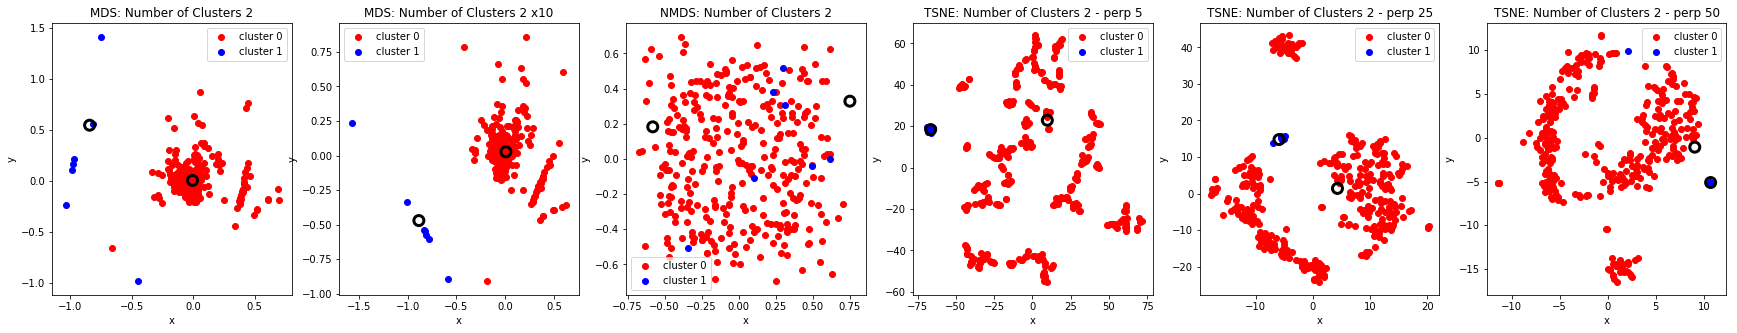

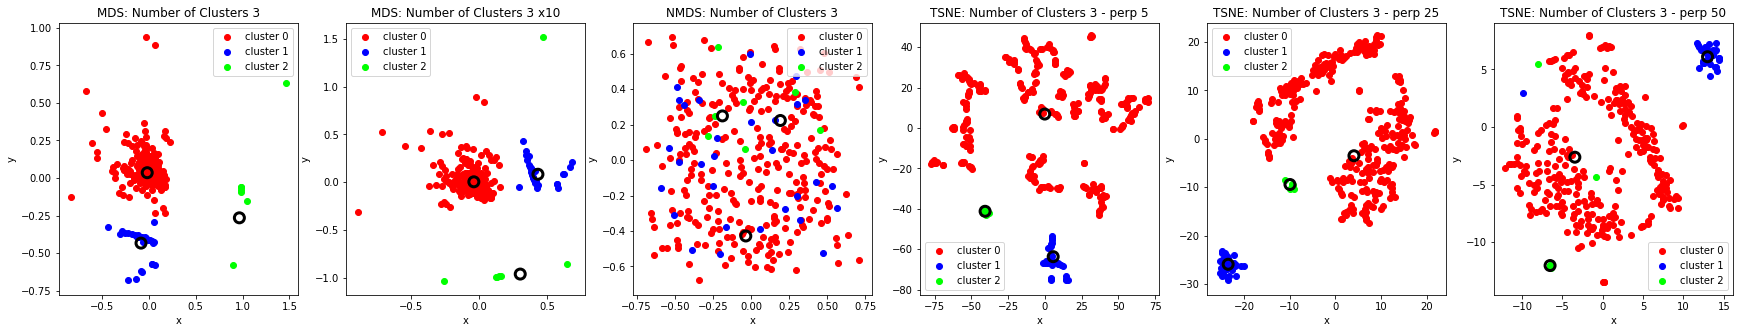

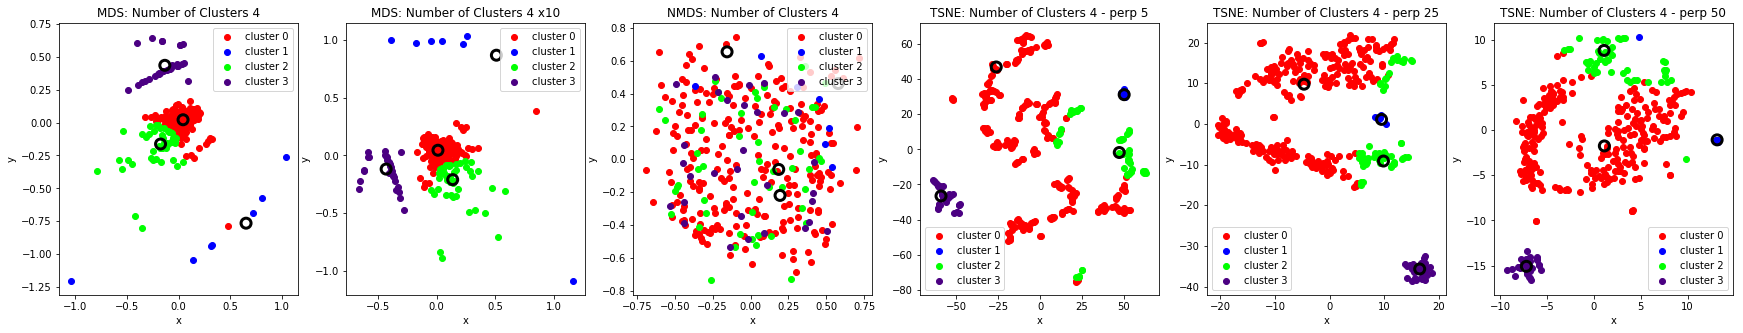

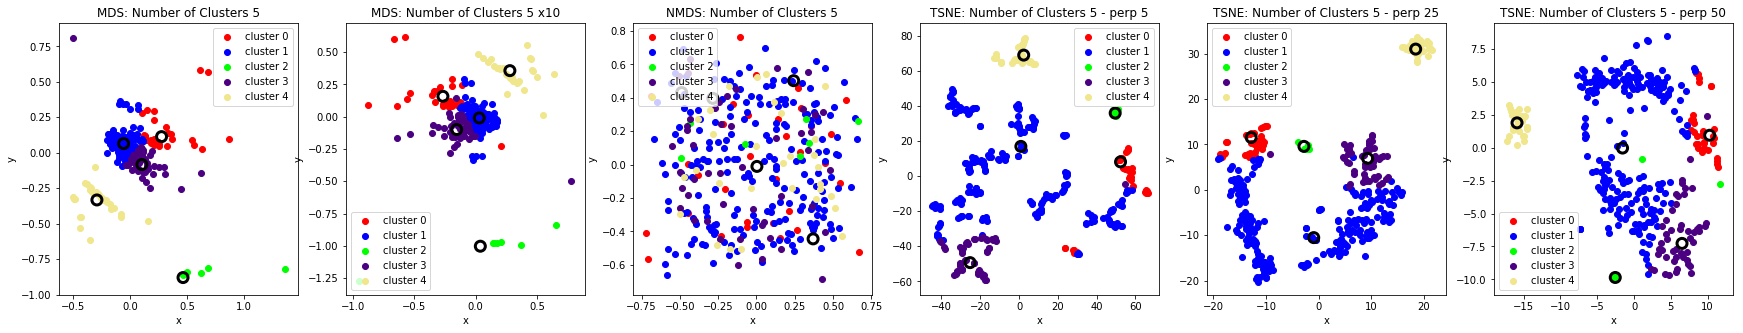

In [65]:
num_clust = 5

for k in range(2, num_clust+1):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300,n_jobs=8).fit(data)
    data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

    f, axs = plt.subplots(1, 6, figsize=(30, 5))
    
    plt.subplot(1, 6, 1)
    XYcoord_mds = manifold.MDS(n_components=2,n_jobs=8).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='MDS: Number of Clusters {}'.format(k))

    plt.subplot(1, 6, 2)
    XYcoord_mds = manifold.MDS(n_components=2,n_init =10,n_jobs=8).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='MDS: Number of Clusters {} x10'.format(k))
    
    plt.subplot(1, 6, 3)
    XYcoord_mds = manifold.MDS(n_components=2,metric=False,n_jobs=8).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='NMDS: Number of Clusters {}'.format(k))


    plt.subplot(1, 6, 4)
    XYcoord_mds = manifold.TSNE(n_components=2,perplexity=5).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='TSNE: Number of Clusters {} - perp {}'.format(k,5))
    plt.subplot(1, 6, 5)
    XYcoord_mds = manifold.TSNE(n_components=2,perplexity=25).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='TSNE: Number of Clusters {} - perp {}'.format(k,25))
    plt.subplot(1, 6, 6)
    XYcoord_mds = manifold.TSNE(n_components=2,perplexity=50).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='TSNE: Number of Clusters {} - perp {}'.format(k,50))
    plt.show()

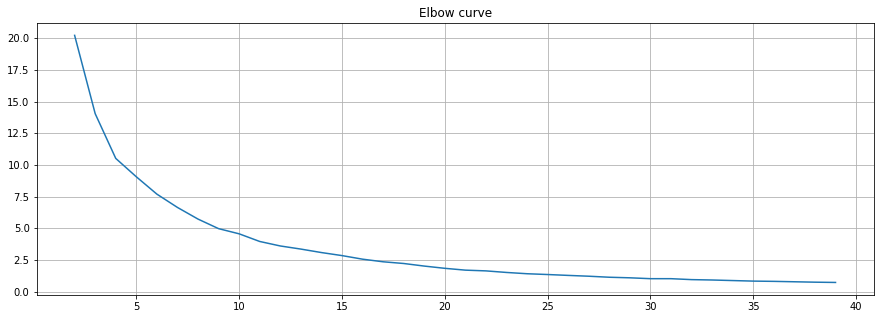

In [22]:
from sklearn.cluster import KMeans
num_clust = 40
distorsions = []
for k in range(2, num_clust):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, num_clust), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [66]:
from sklearn.metrics.pairwise import euclidean_distances

def gap_stat(data,label):
    k = len(np.unique(label))
    n = data.shape[0]
    p = data.shape[1]
    D_r = []
    C_r = []
    for label_number in range(0,k):
        this_label_index = np.where(label==label_number)[0]
        temp_sum = 0
        pairwise_distance_matrix = euclidean_distances(data[this_label_index],squared=True)
        D_r.append(np.sum(pairwise_distance_matrix))
        C_r.append(float(len(this_label_index)))

    W_r = np.sum(np.asarray(D_r)/(2*np.asarray(C_r)))
    gap_stats = np.log(float(p*n)/12)-(2/float(p))*np.log(k)- np.log(W_r)
    return(gap_stats)

In [69]:
k, gapdf = optimalK(data, nrefs=5, maxClusters=30)
print ('Optimal k is: ', k)

Optimal k is:  28


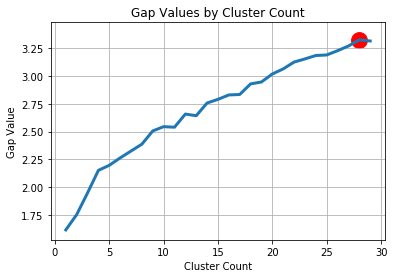

In [70]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [80]:
from numpy.random import random_sample
from math import sqrt, log

def get_rand_data(col):
    rng = col.max() - col.min()
    return pd.Series(random_sample(len(col))*rng + col.min())

def iter_kmeans(df, n_clusters, num_iters=5):
    rng =  range(1, num_iters + 1)
    vals = pd.Series(index=rng)
    for i in rng:
        k = KMeans(n_clusters=n_clusters, n_init=3)
        k.fit(df)
        #print ("Ref k: %s" % k.get_params()['n_clusters'])
        vals[i] = k.inertia_
    return vals

def gap_statistic(df, max_k=10):
    gaps = pd.Series(index = range(1, max_k + 1))
    for k in range(1, max_k + 1):
        km_act = KMeans(n_clusters=k, n_init=3)
        km_act.fit(df)

        # get ref dataset
        ref = df.apply(get_rand_data)
        ref_inertia = iter_kmeans(ref, n_clusters=k).mean()

        gap = log(ref_inertia - km_act.inertia_)

        #print ("Ref: %s   Act: %s  Gap: %s" % ( ref_inertia, km_act.inertia_, gap))
        gaps[k] = gap
    return gaps

In [85]:
gap_statistic(pd.DataFrame(data=data),20)

1     4.725321
2     4.586703
3     4.437442
4     4.390181
5     4.197207
6     4.179392
7     4.114789
8     4.054030
9     4.026142
10    4.000274
11    3.907479
12    3.800135
13    3.850454
14    3.792420
15    3.716263
16    3.715547
17    3.665831
18    3.626383
19    3.625109
20    3.582912
dtype: float64

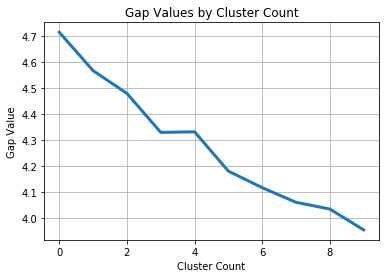

In [86]:
plt.plot(np.arange(len(gaps)), gaps, linewidth=3)
#plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()